## target
task : img classification

data : MNIST

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision

import matplotlib.pyplot as plt

In [51]:
# Hyper parameters
EPOCH = 10
BATCH_SIZE = 1000
LR = 0.01
DOWNLOAD_MNIST = True # 請求下載

## train data

In [3]:
# download data
train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train=True, # is training data
    transform=torchvision.transforms.ToTensor(), # trans from numpy.ary to torch Tensor
    download = DOWNLOAD_MNIST,
)

Processing...
Done!


torch.Size([60000, 28, 28])
torch.Size([60000])


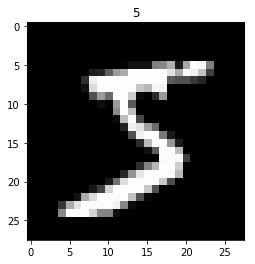

In [4]:
#plot one example
print(train_data.train_data.size())
print(train_data.train_labels.size())

plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [5]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# test data

In [6]:
test_data = torchvision.datasets.MNIST(root='./mnist', train=False)
len(test_data)

10000

In [7]:
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)
test_x = test_x[:2000]/255.

test_y = test_data.test_labels[:2000]

## build CNN

In [52]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(# input size(1,28,28)
            nn.Conv2d( 
                in_channels = 1, # gray(if RGB, then in_channel=3)
                out_channels = 16, # num_filter
                kernel_size=5, # filter's height and width = 5
                stride=1, # shift 1 distance each time
                padding=2, # if stride=1, padding=(kernel_size-1)/2, filled with zero
            ),# -->(16, 28, 28)
            nn.ReLU(),# -->(16, 28, 28)
            nn.MaxPool2d(kernel_size=2,),# -->(16, 14, 14)
        )
        self.conv2 = nn.Sequential(# input size(16,14,14)
            nn.Conv2d(16, 32, 5, 1, 2), #(in, out, kernel, strid, padding) # -->(32, 14, 14)
            nn.ReLU(),# -->(32, 14, 14)
            nn.MaxPool2d(2), # -->(32, 7, 7)
        )
        self.out = nn.Linear(32*7*7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x) # (batch, 32, 7, 7)
        x = x.view(x.size(0), -1) #(batch, 32*7*7)
        output = self.out(x)
        return output

In [53]:
cnn=CNN()
print(cnn)

CNN (
  (conv1): Sequential (
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (conv2): Sequential (
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (out): Linear (1568 -> 10)
)


##  training

In [54]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [55]:
target = False # upto 98% or not

for epoch in range(EPOCH):
    if target: break
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x, requires_grad=True) # batch x
        b_y = Variable(y) # batch y
        
        output = cnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        test_output = cnn(test_x)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        accuracy = sum(pred_y ==test_y)/ test_y.size(0)
                

        print('Epoch ', epoch, ' | step ', step, 
              ' | train loss %.4f'%loss.data[0], 
              ' | test accuracy: %.4f'%accuracy,
#               ' | gradient of loss to input ', frobenius_norm,
                 )
        if accuracy > 0.98:
            target = True
            break

Epoch  0  | step  0  | train loss 2.3038  | test accuracy: 0.0895
Epoch  0  | step  1  | train loss 2.4055  | test accuracy: 0.3020
Epoch  0  | step  2  | train loss 2.1932  | test accuracy: 0.4850
Epoch  0  | step  3  | train loss 2.0841  | test accuracy: 0.6850
Epoch  0  | step  4  | train loss 1.7605  | test accuracy: 0.6725
Epoch  0  | step  5  | train loss 1.3702  | test accuracy: 0.7465
Epoch  0  | step  6  | train loss 0.9244  | test accuracy: 0.6680
Epoch  0  | step  7  | train loss 0.8267  | test accuracy: 0.6345
Epoch  0  | step  8  | train loss 0.9909  | test accuracy: 0.7060
Epoch  0  | step  9  | train loss 0.7458  | test accuracy: 0.7510
Epoch  0  | step  10  | train loss 1.1259  | test accuracy: 0.7395
Epoch  0  | step  11  | train loss 1.0239  | test accuracy: 0.7560
Epoch  0  | step  12  | train loss 0.7303  | test accuracy: 0.8190
Epoch  0  | step  13  | train loss 0.3926  | test accuracy: 0.7860
Epoch  0  | step  14  | train loss 0.5387  | test accuracy: 0.7805
Epoch

Epoch  1  | step  3  | train loss 0.0987  | test accuracy: 0.9800
Epoch  1  | step  4  | train loss 0.0971  | test accuracy: 0.9785
Epoch  1  | step  5  | train loss 0.0970  | test accuracy: 0.9775
Epoch  1  | step  6  | train loss 0.0904  | test accuracy: 0.9740
Epoch  1  | step  7  | train loss 0.0538  | test accuracy: 0.9740
Epoch  1  | step  8  | train loss 0.0617  | test accuracy: 0.9715
Epoch  1  | step  9  | train loss 0.0589  | test accuracy: 0.9710
Epoch  1  | step  10  | train loss 0.0521  | test accuracy: 0.9690
Epoch  1  | step  11  | train loss 0.0874  | test accuracy: 0.9670
Epoch  1  | step  12  | train loss 0.0800  | test accuracy: 0.9690
Epoch  1  | step  13  | train loss 0.1039  | test accuracy: 0.9700
Epoch  1  | step  14  | train loss 0.0694  | test accuracy: 0.9745
Epoch  1  | step  15  | train loss 0.0517  | test accuracy: 0.9745
Epoch  1  | step  16  | train loss 0.0646  | test accuracy: 0.9740
Epoch  1  | step  17  | train loss 0.0503  | test accuracy: 0.9735
Ep

In [ ]:
### train
# train_loss
loss.data[0]
# train_acc
train_x = Variable(torch.unsqueeze(train_data.train_data, dim=1), volatile=True).type(torch.FloatTensor)/255.
train_prediction = cnn.forward(train_x)
train_pred = torch.max(train_prediction, 1)[1].data.squeeze()
train_y = train_data.train_labels
train_acc = sum(train_pred ==train_y)/ train_y.size(0)

### test
test_pred = cnn.forward(test_x)

# test_loss
test_loss = loss_func(test_pred, Variable(test_y))
# test_acc
test_pred = torch.max(test_pred, 1)[1].data.squeeze()
test_acc = sum(test_pred ==test_y)/ test_y.size(0)

In [ ]:
print('Batch size : %s \n' % str(BATCH_SIZE))


# training data
print('train_loss %.4f' % loss.data[0]) # training loss
print('train_acc %.4f' % train_acc)
print('test_loss %.4f' % test_loss.data[0])
print('test_acc %.4f' % test_acc)

In [56]:
torch.save(cnn.state_dict(), './output/batch_1000_weight')
cnn.state_dict()

OrderedDict([('conv1.0.weight', 
              (0 ,0 ,.,.) = 
                0.0158  0.0403  0.0528  0.0827  0.1460
               -0.1770  0.2452  0.1085  0.0891 -0.1623
                0.1601  0.2556  0.1772 -0.2450 -0.3134
                0.1226  0.2723 -0.1509 -0.1824  0.0640
               -0.1373  0.1742  0.0582 -0.0382  0.0155
              
              (1 ,0 ,.,.) = 
                0.1263  0.1729 -0.0200  0.2149  0.1740
                0.2587  0.2947  0.3108 -0.0563  0.2721
               -0.1399  0.1162 -0.0232  0.1300 -0.0653
               -0.2741 -0.2213 -0.0656  0.0635  0.0107
               -0.3065 -0.2012 -0.3409 -0.1871 -0.0606
              
              (2 ,0 ,.,.) = 
               -0.2520 -0.0662  0.1957 -0.0973 -0.0200
               -0.2052  0.1190  0.0547  0.2190 -0.2584
               -0.4580  0.1426  0.2589 -0.0570 -0.1024
               -0.2395 -0.1034  0.2593  0.1226 -0.0681
               -0.2993 -0.0842  0.2346  0.2295 -0.1213
              
          

In [97]:
cnn.state_dict()['conv1.0.weight'] *=2
cnn.state_dict()['conv1.0.weight']


(0 ,0 ,.,.) = 
  8.6799e+09  2.2180e+10  2.9011e+10  4.5454e+10  8.0286e+10
 -9.7291e+10  1.3480e+11  5.9660e+10  4.8984e+10 -8.9234e+10
  8.8004e+10  1.4051e+11  9.7416e+10 -1.3469e+11 -1.7229e+11
  6.7406e+10  1.4972e+11 -8.2969e+10 -1.0029e+11  3.5183e+10
 -7.5476e+10  9.5747e+10  3.1972e+10 -2.0985e+10  8.4943e+09

(1 ,0 ,.,.) = 
  6.9443e+10  9.5080e+10 -1.0977e+10  1.1815e+11  9.5633e+10
  1.4220e+11  1.6201e+11  1.7087e+11 -3.0935e+10  1.4960e+11
 -7.6920e+10  6.3879e+10 -1.2752e+10  7.1446e+10 -3.5882e+10
 -1.5071e+11 -1.2168e+11 -3.6053e+10  3.4932e+10  5.9019e+09
 -1.6850e+11 -1.1059e+11 -1.8740e+11 -1.0286e+11 -3.3305e+10

(2 ,0 ,.,.) = 
 -1.3855e+11 -3.6419e+10  1.0760e+11 -5.3486e+10 -1.1007e+10
 -1.1282e+11  6.5434e+10  3.0046e+10  1.2042e+11 -1.4206e+11
 -2.5181e+11  7.8391e+10  1.4231e+11 -3.1319e+10 -5.6314e+10
 -1.3167e+11 -5.6847e+10  1.4253e+11  6.7386e+10 -3.7441e+10
 -1.6455e+11 -4.6314e+10  1.2896e+11  1.2616e+11 -6.6670e+10

(3 ,0 ,.,.) = 
  7.2853e+09  8.6910e